# Data Analysis

Vamos juntar tudo que aprendemos, e iniciar a exploração sobre uma base de dados, realizando experimentos com os modelos que aprendemos.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [3]:
sc = SparkContext('local')
log_txt = sc.textFile("data/BaseCesarSchool.txt")
sqlContext = SQLContext(sc)

In [4]:
header = log_txt.first()
header_split = header.split("	")
print(header_split)

[u'ID', u'DtRef', u'IND_BOM_1', u'CEP', u'UF', u'IDADE', u'SEXO', u'NIVEL_RELACIONAMENTO_AUTOMOVEL', u'NIVEL_RELACIONAMENTO_SEGUROS01', u'NIVEL_RELACIONAMENTO_CREDITO03', u'NIVEL_RELACIONAMENTO_CREDITO04', u'NIVEL_RELACIONAMENTO_VAREJO', u'NIVEL_RELACIONAMENTO_SEGUROS02', u'NIVEL_RELACIONAMENTO_CREDITO01', u'NIVEL_RELACIONAMENTO_CREDITO02', u'BANCO_REST_IRPF_ULTIMA', u'ATIVIDADE_EMAIL', u'EXPOSICAO_ENDERECO', u'EXPOSICAO_EMAIL', u'EXPOSICAO_TELEFONE', u'ATIVIDADE_ENDERECO', u'ATUALIZACAO_ENDERECO', u'ATUALIZACAO_EMAIL', u'EXPOSICAO_CONSUMIDOR_COBRANCA', u'EXPOSICAO_CONSUMIDOR_EMAILS', u'EXPOSICAO_CONSUMIDOR_TELEFONES', u'ATIVIDADE_TELEFONE', u'VALOR_PARCELA_BOLSA_FAMILIA', u'FLAG_BOLSA_FAMILIA', u'SIGLA_PARTIDO_FILIADO', u'FLAG_FILIADO_PARTIDO_POLITICO', u'REMUNERACAO_SEVIDOR_CIVIL', u'FLAG_SERVIDOR_CIVIL', u'REMUNERACAO_SERVIDOR_MILITAR', u'FLAG_SERVIDOR_MILITAR', u'FLAG_PROUNI', u'RENDA_VIZINHANCA', u'QUANTIDADE_VIZINHANCA', u'COMPARATIVO_RENDA_CEP', u'CLASSE_SOCIAL_CONSUMIDOR', u'AT

In [5]:
log_txt = log_txt.filter(lambda line: line != header)
print log_txt.take(10)[3].split("	")

[u'5595', u'20160101', u'1', u'30140002', u'MG', u'52.88493150684931', u'F', u' ', u' ', u'1', u' ', u' ', u' ', u'1', u' ', u' ', u' ', u'19', u' ', u'4', u'2.2705364', u'0.3472488', u' ', u' ', u'0', u'1', u'6.6513586', u'154.0', u'1', u' ', u'0', u' ', u'0', u' ', u'0', u'1', u'ATE 2 SM', u'5187', u'1', u'D', u' ', u' ', u'1', u'1.0468832', u'0.93351716', u'0.14296035', u'0.14296035', u'0.07480878', u'0.03970214', u'0.1888529', u'0.06577337', u'0.20448162', u'0.123095535', u'0.8145828', u'0.29006267', u'0.2945903', u'0.5556791', u'1.1812762', u'0.15259692', u'0.24172018', u'0.32285312', u'0.1581816', u'0.151953', u'0.14346564', u'0.3127413', u'0.2755211', u'0.086209804', u'0.07480878', u'0.46719196', u'0.101209514', u'0.30325076', u'0.2312995', u'0.028814586', u'0.5163444', u'1.384862', u'0.23941728', u'1.2796113', u'0.16180561', u'218.81659', u'300.0', u'300.0', u'4', u'6', u'64', u'179', u'160', u'215', u'2373', u'215', u'151', u'204', u'213', u'19', u'95', u'32', u'24', u'5736', 

In [6]:
temp_var = log_txt.map(lambda k: k.split("	"))
print "Number of instances: {}".format(temp_var.countApprox(1000, 1.0))

Number of instances: 518930


## From Spark to Pandas DataFrame

In [7]:
sample = temp_var.take(2000)

In [8]:
df = pd.DataFrame(data=sample, columns=header_split)
df.head()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_AUTOMOVEL,NIVEL_RELACIONAMENTO_SEGUROS01,NIVEL_RELACIONAMENTO_CREDITO03,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
0,1617,20160501,1,07085460,SP,63.00547945205479,M,,,1,...,0,851,0,0,0,1,0,07,070,0708
1,4106,20160101,1,35420000,MG,60.52876712328767,M,,,1,...,0,1,0,0,0,1,3,35,354,3542
2,2357,20160101,0,80010010,PR,20.446575342465753,F,,,1,...,0,4380,0,0,0,1,8,80,800,8001
3,5595,20160101,1,30140002,MG,52.88493150684931,F,,,1,...,0,5580,0,0,0,1,3,30,301,3014
4,1022,20160101,1,59073120,RN,30.75068493150685,M,,,1,...,0,85,0,0,0,1,5,59,590,5907


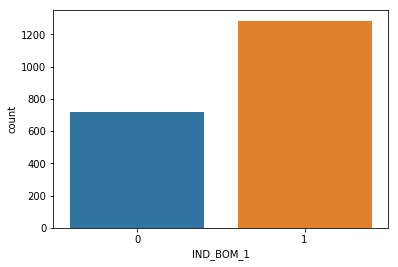

In [9]:
# Vamos ver se pegamos uma amostra interessante com classes balanceadas
sns.countplot(x='IND_BOM_1', data=df)

In [10]:
# checking for missing data
print('Has missing data: {}'.format(df.isnull().values.any()))

Has missing data: False


In [11]:
# Empty string is NULL, então vamos dar um replace
df.replace(to_replace=' ', value=np.nan, inplace=True)
print('Has missing data: {}'.format(df.isnull().values.any()))

Has missing data: True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 140 entries, ID to CEP4
dtypes: object(140)
memory usage: 2.1+ MB


In [13]:
df.describe()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_AUTOMOVEL,NIVEL_RELACIONAMENTO_SEGUROS01,NIVEL_RELACIONAMENTO_CREDITO03,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
count,2000,2000,2000,2000,2000,1999,1985,10,10,2000,...,1858,1858,1858,1858,1858,1858,2000,2000,2000,2000
unique,1772,4,2,1840,27,1881,2,9,5,3,...,2,583,2,2,2,1,10,98,652,1484
top,1176,20160901,1,97670000,SP,38.92876712328767,M,36.0,1,1,...,0,10000,0,0,0,1,1,13,130,3840
freq,3,527,1284,5,489,3,1040,2,4,1990,...,1778,375,1807,1716,1812,1858,252,76,18,7


In [14]:
df.head()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_AUTOMOVEL,NIVEL_RELACIONAMENTO_SEGUROS01,NIVEL_RELACIONAMENTO_CREDITO03,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
0,1617,20160501,1,07085460,SP,63.00547945205479,M,NaN,NaN,1,...,0,851,0,0,0,1,0,07,070,0708
1,4106,20160101,1,35420000,MG,60.52876712328767,M,NaN,NaN,1,...,0,1,0,0,0,1,3,35,354,3542
2,2357,20160101,0,80010010,PR,20.446575342465753,F,NaN,NaN,1,...,0,4380,0,0,0,1,8,80,800,8001
3,5595,20160101,1,30140002,MG,52.88493150684931,F,NaN,NaN,1,...,0,5580,0,0,0,1,3,30,301,3014
4,1022,20160101,1,59073120,RN,30.75068493150685,M,NaN,NaN,1,...,0,85,0,0,0,1,5,59,590,5907


In [15]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

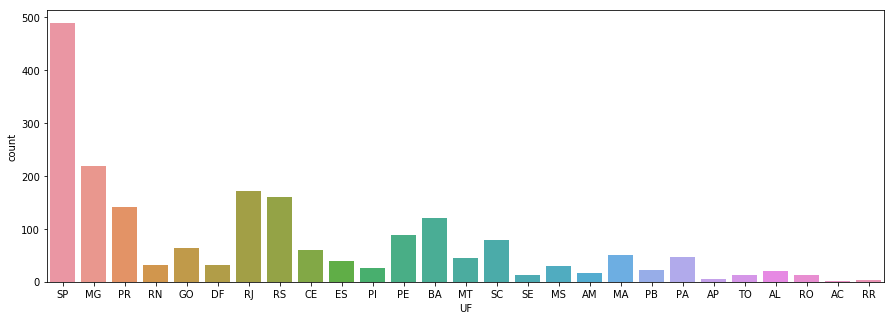

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x='UF', data=df)

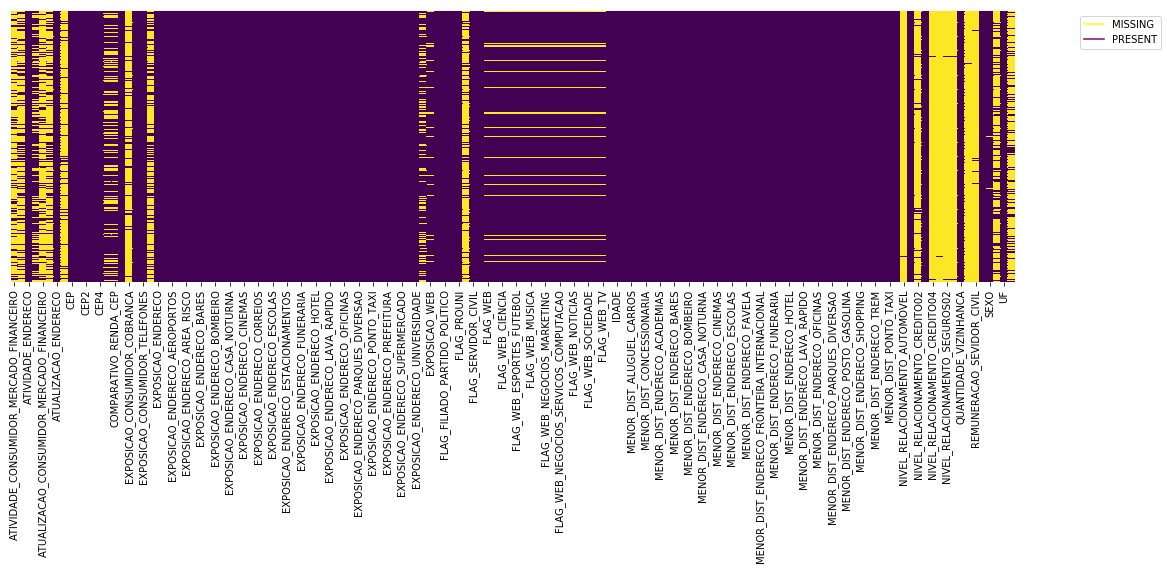

In [20]:
# ANALYSING MISSING DATA
plt.figure(figsize=(18,5))

#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='PRESENT')

# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(df[sorted(df.columns)].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

In [40]:
# Target variable does not have missing data
df['IND_BOM_1'].isnull().any()

False

In [46]:
# vertical elimination
to_be_eliminated = []
for col_name in df.columns: 
    # eliminate columns with more than 50% of missing data
    if df[col_name].isnull().any() and sum(df[col_name].isnull()) > int(0.5 * len(df)):
        to_be_eliminated.append(col_name)
        
print(to_be_eliminated)

[u'NIVEL_RELACIONAMENTO_AUTOMOVEL', u'NIVEL_RELACIONAMENTO_SEGUROS01', u'NIVEL_RELACIONAMENTO_CREDITO04', u'NIVEL_RELACIONAMENTO_VAREJO', u'NIVEL_RELACIONAMENTO_SEGUROS02', u'NIVEL_RELACIONAMENTO_CREDITO02', u'BANCO_REST_IRPF_ULTIMA', u'ATIVIDADE_EMAIL', u'EXPOSICAO_EMAIL', u'ATUALIZACAO_EMAIL', u'EXPOSICAO_CONSUMIDOR_COBRANCA', u'VALOR_PARCELA_BOLSA_FAMILIA', u'SIGLA_PARTIDO_FILIADO', u'REMUNERACAO_SEVIDOR_CIVIL', u'REMUNERACAO_SERVIDOR_MILITAR', u'ATIVIDADE_CONSUMIDOR_MERCADO_FINANCEIRO', u'ATUALIZACAO_CONSUMIDOR_MERCADO_FINANCEIRO', u'FLAG_REDE_SOCIAL']


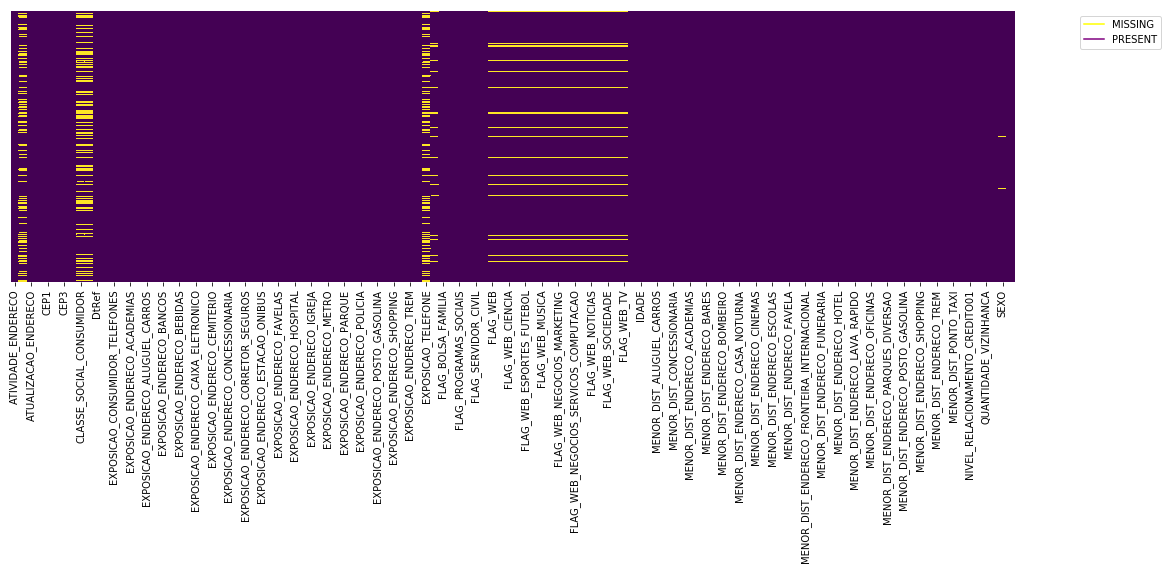

In [47]:
filtered_df = df.drop(labels=to_be_eliminated, axis=1)

# ANALYSING MISSING DATA
plt.figure(figsize=(18,5))

#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='PRESENT')

# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(filtered_df[sorted(filtered_df.columns)].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

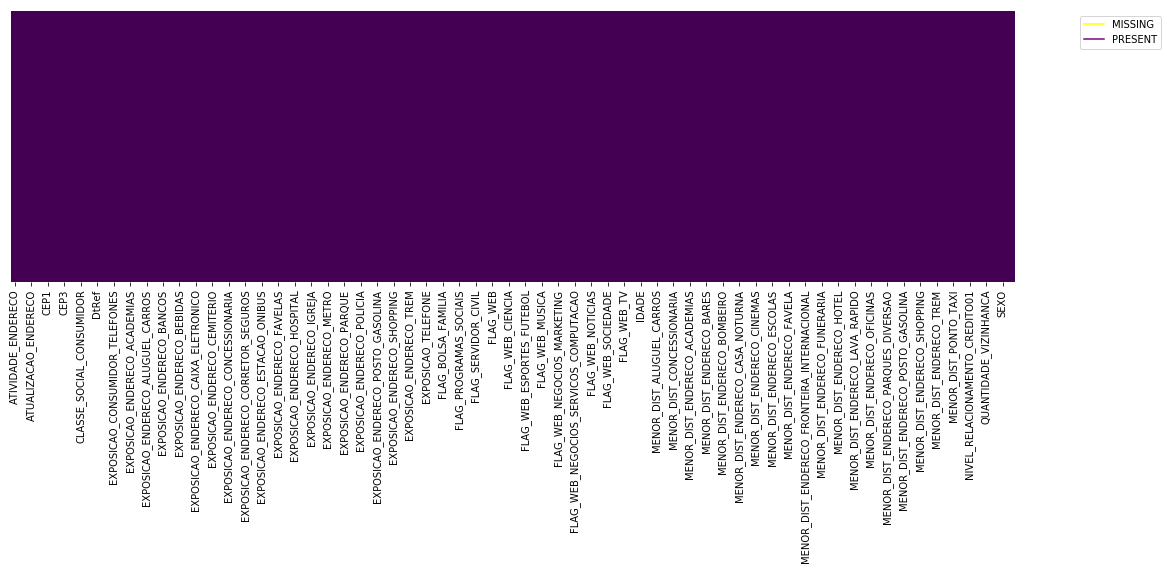

In [48]:
# horizontal elimination
filtered_df.dropna(inplace=True)

# ANALYSING MISSING DATA
plt.figure(figsize=(18,5))

#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='PRESENT')

# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(filtered_df[sorted(filtered_df.columns)].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

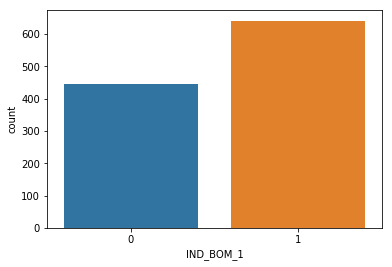

In [51]:
sns.countplot(x='IND_BOM_1', data=filtered_df)

In [50]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 2 to 1999
Columns: 122 entries, ID to CEP4
dtypes: float64(65), int64(53), object(4)
memory usage: 1.0+ MB


In [52]:
filtered_df.head()

,ID,DtRef,IND_BOM_1,CEP,UF,IDADE,SEXO,NIVEL_RELACIONAMENTO_CREDITO03,NIVEL_RELACIONAMENTO_CREDITO01,EXPOSICAO_ENDERECO,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
2,2357,20160101,0,80010010,PR,20.446575,F,1,1,2.0,...,0.0,4380.0,0.0,0.0,0.0,1.0,8,80,800,8001
3,5595,20160101,1,30140002,MG,52.884932,F,1,1,19.0,...,0.0,5580.0,0.0,0.0,0.0,1.0,3,30,301,3014
4,1022,20160101,1,59073120,RN,30.750685,M,1,1,3.0,...,0.0,85.0,0.0,0.0,0.0,1.0,5,59,590,5907
6,7119,20160901,0,71593425,DF,36.019178,M,1,1,1.0,...,0.0,2460.0,0.0,0.0,0.0,1.0,7,71,715,7159
7,1343,20161201,1,25212430,RJ,27.873973,F,1,1,1.0,...,0.0,10000.0,0.0,1.0,0.0,1.0,2,25,252,2521


In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = filtered_df.select_dtypes(include=numerics)

print(newdf.columns)

Index([u'ID', u'DtRef', u'IND_BOM_1', u'CEP', u'IDADE',
       u'NIVEL_RELACIONAMENTO_CREDITO03', u'NIVEL_RELACIONAMENTO_CREDITO01',
       u'EXPOSICAO_ENDERECO', u'EXPOSICAO_TELEFONE', u'ATIVIDADE_ENDERECO',
       ...
       u'FLAG_WEB_SOCIEDADE_GENEALOGIA', u'EXPOSICAO_WEB', u'FLAG_WEB_CIENCIA',
       u'FLAG_WEB_COMPRAS', u'FLAG_WEB_ESPORTES_FUTEBOL', u'FLAG_WEB', u'CEP1',
       u'CEP2', u'CEP3', u'CEP4'],
      dtype='object', length=118)


In [54]:
newdf.head()

,ID,DtRef,IND_BOM_1,CEP,IDADE,NIVEL_RELACIONAMENTO_CREDITO03,NIVEL_RELACIONAMENTO_CREDITO01,EXPOSICAO_ENDERECO,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,...,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB,CEP1,CEP2,CEP3,CEP4
2,2357,20160101,0,80010010,20.446575,1,1,2.0,1.0,1.947249,...,0.0,4380.0,0.0,0.0,0.0,1.0,8,80,800,8001
3,5595,20160101,1,30140002,52.884932,1,1,19.0,4.0,2.270536,...,0.0,5580.0,0.0,0.0,0.0,1.0,3,30,301,3014
4,1022,20160101,1,59073120,30.750685,1,1,3.0,1.0,2.270536,...,0.0,85.0,0.0,0.0,0.0,1.0,5,59,590,5907
6,7119,20160901,0,71593425,36.019178,1,1,1.0,2.0,2.270536,...,0.0,2460.0,0.0,0.0,0.0,1.0,7,71,715,7159
7,1343,20161201,1,25212430,27.873973,1,1,1.0,1.0,2.015742,...,0.0,10000.0,0.0,1.0,0.0,1.0,2,25,252,2521


In [63]:
x = newdf.drop(labels=['IND_BOM_1'], axis=1)
x.drop(labels=['IDADE', 'ID', 'DtRef', 'CEP', 'CEP1', 'CEP2', 'CEP3', 'CEP4'], axis=1, inplace=True)

y = newdf['IND_BOM_1']

In [64]:
x.head()

,NIVEL_RELACIONAMENTO_CREDITO03,NIVEL_RELACIONAMENTO_CREDITO01,EXPOSICAO_ENDERECO,EXPOSICAO_TELEFONE,ATIVIDADE_ENDERECO,ATUALIZACAO_ENDERECO,EXPOSICAO_CONSUMIDOR_EMAILS,EXPOSICAO_CONSUMIDOR_TELEFONES,ATIVIDADE_TELEFONE,FLAG_BOLSA_FAMILIA,...,FLAG_WEB_NEGOCIOS_SERVICOS_COMPUTACAO,FLAG_WEB_SAUDE,FLAG_WEB_NOTICIAS,FLAG_WEB_SOCIEDADE,FLAG_WEB_SOCIEDADE_GENEALOGIA,EXPOSICAO_WEB,FLAG_WEB_CIENCIA,FLAG_WEB_COMPRAS,FLAG_WEB_ESPORTES_FUTEBOL,FLAG_WEB
2,1,1,2.0,1.0,1.947249,1.818482,0.0,1.0,1.818482,0,...,0.0,0.0,1.0,0.0,0.0,4380.0,0.0,0.0,0.0,1.0
3,1,1,19.0,4.0,2.270536,0.347249,0.0,1.0,6.651359,1,...,0.0,1.0,0.0,0.0,0.0,5580.0,0.0,0.0,0.0,1.0
4,1,1,3.0,1.0,2.270536,1.947249,0.0,1.0,2.015742,0,...,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,1.0
6,1,1,1.0,2.0,2.270536,2.270536,0.0,2.0,2.308893,0,...,0.0,0.0,0.0,0.0,0.0,2460.0,0.0,0.0,0.0,1.0
7,1,1,1.0,1.0,2.015742,2.015742,0.0,1.0,2.015742,1,...,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,1.0,0.0,1.0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25)

In [66]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [68]:
knn.score(X_test_std, y_test)

0.5882352941176471

## Majority Vote Classifier - Ensemble Method

In [71]:
import numpy as np
import operator

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
from sklearn.externals import six
from sklearn.pipeline import _name_estimators
from sklearn.preprocessing import LabelEncoder

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, classifiers, votes='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key:value for key, value in _name_estimators(classifiers)}
        self.votes = votes
        self.weights = weights
        
    def fit(self, X, y):
        if self.votes not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'; got (vote=%r)" % self.vote)
        
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal ; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))
            
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        if self.votes == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            preds = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x : np.argmax(np.bincount(x, weights=self.weights)),
                                           axis=1, arr=preds)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

## Combinando as diferentes tecnicas para Ensemble Classification

In [72]:
dim = len(x.columns)

clf1 = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(dim, dim/2, 2*dim),
                    max_iter=500)
clf2 = SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
clf3 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clfM = MajorityVoteClassifier(classifiers=[clf1, clf2, clf3])
clf_labels = ['MLP', 'SVM', 'Random Forests', 'Majority Voting']
clfs = [clf1, clf2, clf3, clfM]

Text(0,0.5,'True Positive Rate')

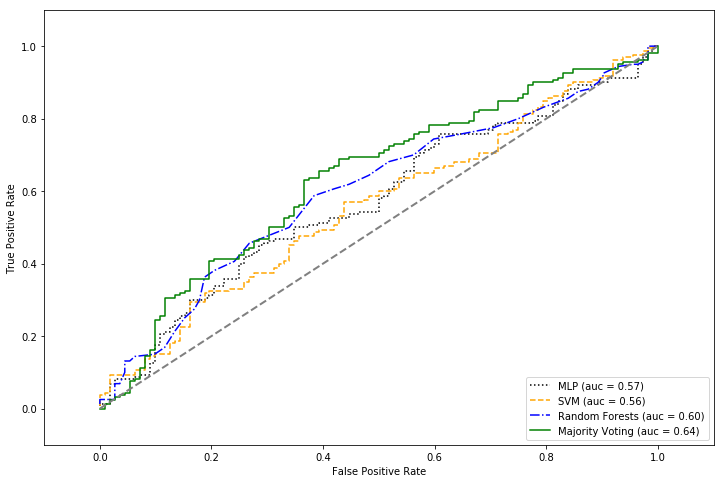

In [73]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

plt.figure(figsize=(12,8))
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
    preds = clf.fit(X_train_std, y_train).predict_proba(X_test_std)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=preds)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

SCORE: 0.577205882353
             precision    recall  f1-score   support

          0       0.48      0.41      0.44       112
          1       0.63      0.69      0.66       160

avg / total       0.57      0.58      0.57       272

SCORE: 0.580882352941
             precision    recall  f1-score   support

          0       0.48      0.19      0.27       112
          1       0.60      0.86      0.71       160

avg / total       0.55      0.58      0.53       272

SCORE: 0.610294117647
             precision    recall  f1-score   support

          0       0.55      0.30      0.39       112
          1       0.63      0.82      0.71       160

avg / total       0.60      0.61      0.58       272



/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/label.py:167: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


SCORE: 0.577205882353
             precision    recall  f1-score   support

          0       0.48      0.26      0.34       112
          1       0.61      0.80      0.69       160

avg / total       0.55      0.58      0.54       272



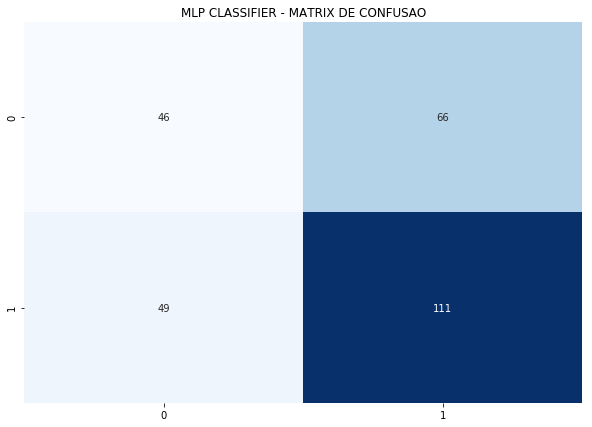

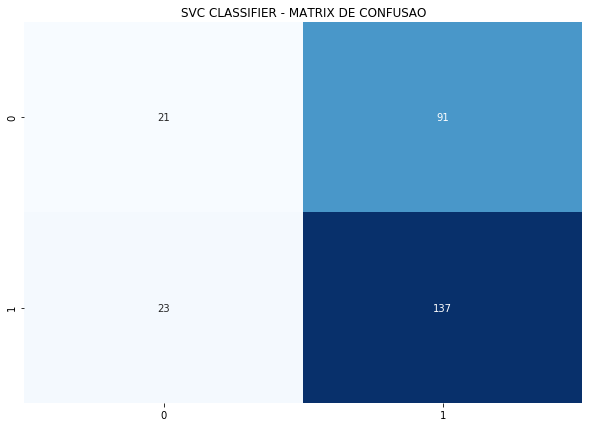

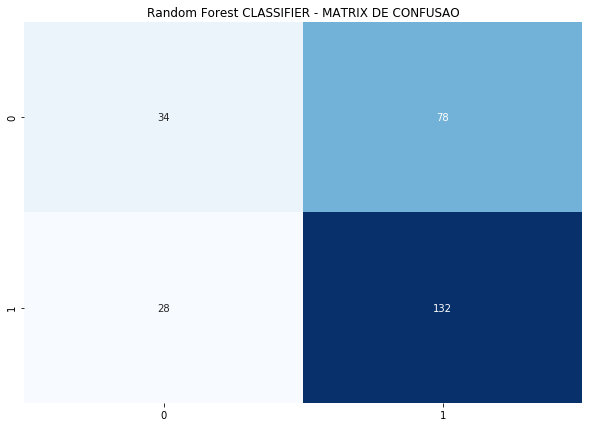

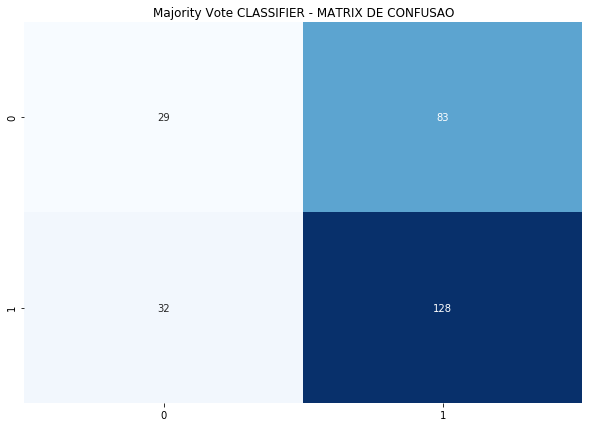

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf_names = ['MLP', 'SVC', 'Random Forest', 'Majority Vote']
for name, clf in zip(clf_names, clfs):
    clf.fit(X_train_std, y_train)
    print 'SCORE: {}'.format(clf.score(X_test_std, y_test))
    preds = clf.predict(X_test_std)
    cfm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
    plt.title('{} CLASSIFIER - MATRIX DE CONFUSAO'.format(name))
    print classification_report(y_test, preds)
    print("=" * 50)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_std, y_train)
print gbc.score(X_test_std, y_test)

0.5955882352941176


In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,
                           scoring='roc_auc', n_jobs = -1, verbose = 2)

In [80]:
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=100, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=2, min_samples_split=8, max_depth=80 
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=10

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s


[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=8, max_depth=80 -   0.9s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=2, min_samples_split=12, max_depth=80 -   0.2s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=2, min_samples_split=12, max_depth=80 -   0.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=2, min_samples_split=12, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=2, min_samples_split=12, max_depth=80 -   0.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=2, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=2

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min


[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=300, max_features=3, min_samples_split=8, max_depth=80 -   0.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=300, max_features=3, min_samples_split=8, max_depth=80 -   0.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=300, max_features=3, min_samples_split=8, max_depth=80 -   0.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=80 -   0.1s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=10, max_depth=80 
[CV]  bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min


[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=200, max_features=3, min_samples_split=12, max_depth=90 -   0.3s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=3, min_samples_split=12, max_depth=90 -   0.4s
[CV] bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3, min_samples_split=12, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=3, min_samples_split=12, max_depth=90 -   0.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=300, max_features=3, min_samples_split=12, max_depth=90 -   0.4s
[CV] bootstrap=True, min_samples_leaf=4, n_estimators=100, max_features=3, min_samples_split=8, max_depth=90 
[CV]  bootstrap=True, min_samples_leaf=3, n_estimators=1000, max_features=3,

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.7min


[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 -   1.6s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 -   1.5s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=200, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=100, max_features=3, min_samples_split=12, max_depth=100 -   0.1s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=300, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=1000, max_features=3, min_samples_split=8, max_depth=100 -   1.4s
[CV] bootstrap=True, min_samples_leaf=5, n_estimators=300, max_features=3, min_samples_split=12, max_depth=100 
[CV]  bootstrap=True, min_samples_leaf=5, n_estimators=200, max_feat

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'min_samples_leaf': [3, 4, 5], 'n_estimators': [100, 200, 300, 1000], 'min_samples_split': [8, 10, 12], 'max_features': [2, 3], 'max_depth': [80, 90, 100, 110]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [81]:
grid_search.score(X_test_std, y_test)

0.5882352941176471

## Using Spark DataFrame

In [57]:
from pyspark.sql import Row

In [59]:
print(header_split)

[u'ID', u'DtRef', u'IND_BOM_1', u'CEP', u'UF', u'IDADE', u'SEXO', u'NIVEL_RELACIONAMENTO_AUTOMOVEL', u'NIVEL_RELACIONAMENTO_SEGUROS01', u'NIVEL_RELACIONAMENTO_CREDITO03', u'NIVEL_RELACIONAMENTO_CREDITO04', u'NIVEL_RELACIONAMENTO_VAREJO', u'NIVEL_RELACIONAMENTO_SEGUROS02', u'NIVEL_RELACIONAMENTO_CREDITO01', u'NIVEL_RELACIONAMENTO_CREDITO02', u'BANCO_REST_IRPF_ULTIMA', u'ATIVIDADE_EMAIL', u'EXPOSICAO_ENDERECO', u'EXPOSICAO_EMAIL', u'EXPOSICAO_TELEFONE', u'ATIVIDADE_ENDERECO', u'ATUALIZACAO_ENDERECO', u'ATUALIZACAO_EMAIL', u'EXPOSICAO_CONSUMIDOR_COBRANCA', u'EXPOSICAO_CONSUMIDOR_EMAILS', u'EXPOSICAO_CONSUMIDOR_TELEFONES', u'ATIVIDADE_TELEFONE', u'VALOR_PARCELA_BOLSA_FAMILIA', u'FLAG_BOLSA_FAMILIA', u'SIGLA_PARTIDO_FILIADO', u'FLAG_FILIADO_PARTIDO_POLITICO', u'REMUNERACAO_SEVIDOR_CIVIL', u'FLAG_SERVIDOR_CIVIL', u'REMUNERACAO_SERVIDOR_MILITAR', u'FLAG_SERVIDOR_MILITAR', u'FLAG_PROUNI', u'RENDA_VIZINHANCA', u'QUANTIDADE_VIZINHANCA', u'COMPARATIVO_RENDA_CEP', u'CLASSE_SOCIAL_CONSUMIDOR', u'AT

In [60]:
spark_df = temp_var.toDF(header_split)

In [62]:
spark_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- DtRef: string (nullable = true)
 |-- IND_BOM_1: string (nullable = true)
 |-- CEP: string (nullable = true)
 |-- UF: string (nullable = true)
 |-- IDADE: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_AUTOMOVEL: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS01: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO03: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO04: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_VAREJO: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS02: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO01: string (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO02: string (nullable = true)
 |-- BANCO_REST_IRPF_ULTIMA: string (nullable = true)
 |-- ATIVIDADE_EMAIL: string (nullable = true)
 |-- EXPOSICAO_ENDERECO: string (nullable = true)
 |-- EXPOSICAO_EMAIL: string (nullable = true)
 |-- EXPOSICAO_TELEFONE: string (nullable = true)


In [67]:
for col_name in header_split:
    try:
        spark_df = spark_df.withColumn(col_name, spark_df[col_name].cast(FloatType()))
    except:
        spark_df = spark_df.withColumn(col_name, spark_df[col_name].cast(StringType()))

In [68]:
spark_df.printSchema()

root
 |-- ID: float (nullable = true)
 |-- DtRef: float (nullable = true)
 |-- IND_BOM_1: float (nullable = true)
 |-- CEP: float (nullable = true)
 |-- UF: float (nullable = true)
 |-- IDADE: float (nullable = true)
 |-- SEXO: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_AUTOMOVEL: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS01: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO03: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO04: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_VAREJO: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_SEGUROS02: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO01: float (nullable = true)
 |-- NIVEL_RELACIONAMENTO_CREDITO02: float (nullable = true)
 |-- BANCO_REST_IRPF_ULTIMA: float (nullable = true)
 |-- ATIVIDADE_EMAIL: float (nullable = true)
 |-- EXPOSICAO_ENDERECO: float (nullable = true)
 |-- EXPOSICAO_EMAIL: float (nullable = true)
 |-- EXPOSICAO_TELEFONE: float (nullable = true)
 |-- ATIVIDADE_ENDER

In [70]:
spark_df.select('IND_BOM_1').show(10)

+---------+
|IND_BOM_1|
+---------+
|      1.0|
|      1.0|
|      0.0|
|      1.0|
|      1.0|
|      1.0|
|      0.0|
|      1.0|
|      1.0|
|      0.0|
+---------+
only showing top 10 rows



In [74]:
from pyspark.ml.linalg import DenseVector
from pyspark.sql import SparkSession

spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

input_data = spark_df.rdd.map(lambda x: (x[2], DenseVector(x[7:15])))
df = spark.createDataFrame(input_data, ["label", "features"])

In [79]:
df.take(2)

[Row(label=1.0, features=DenseVector([nan, nan, 1.0, nan, nan, nan, 1.0, nan])),
 Row(label=1.0, features=DenseVector([nan, nan, 1.0, nan, nan, nan, 1.0, nan]))]

In [75]:
from pyspark.ml.feature import StandardScaler

standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")
scaler = standardScaler.fit(df)
scaled_df = scaler.transform(df)

In [80]:
train_data, test_data = scaled_df.randomSplit([.75,.25],seed=1234)

In [ ]:
from pyspark.ml.classification import LogisticRegression

lc = LogisticRegression(labelCol="label", maxIter=10)
logistModel = lc.fit(train_data)

In [ ]:
predicted = linearModel.transform(test_data)